# Asteroid Hazard Prediction with Artificial Neural Networks

Predicting if asteroids are hazardous or not based on diameter, eccentricity, oscillation, and more, using keras to build a neural network.

We will first analyze the data, including the features and correlation. We will then proceed to building two neural networks, one without any modifications and one with. Afterwards, we will analyze both models, including their accuracy, precision, recall, F1-Score, and more by plotting a Confusion matrix, loss functions, and ROC Curves.

In [1]:
# Importing Dependencies
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_curve
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
from sklearn import metrics
from sklearn.metrics import auc, roc_curve
from sklearn.linear_model import LogisticRegression

# The Data

The data used in training the model is a dataset of asteroid from NASA's Jet Propulsion Labratory

Let's explore the data:

In [2]:
# Reading Data
df=pd.read_csv('dataset.csv',low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 958524 entries, 0 to 958523

Data columns (total 45 columns):

 #   Column          Non-Null Count   Dtype  

---  ------          --------------   -----  

 0   id              958524 non-null  object 

 1   spkid           958524 non-null  int64  

 2   full_name       958524 non-null  object 

 3   pdes            958524 non-null  object 

 4   name            22064 non-null   object 

 5   prefix          18 non-null      object 

 6   neo             958520 non-null  object 

 7   pha             938603 non-null  object 

 8   H               952261 non-null  float64

 9   diameter        136209 non-null  float64

 10  albedo          135103 non-null  float64

 11  diameter_sigma  136081 non-null  float64

 12  orbit_id        958524 non-null  object 

 13  epoch           958524 non-null  float64

 14  epoch_mjd       958524 non-null  int64  

 15  epoch_cal       958524 non-null  float64

 16  equinox         958524 non-null  ob

**Basic Column Definition**

* SPK-ID: Object primary SPK-ID
* Object ID: Object internal database ID
* Object fullname: Object full name/designation
* pdes: Object primary designation
* name: Object IAU name
* NEO: Near-Earth Object (NEO) flag
* PHA: Potentially Hazardous Asteroid (PHA) flag
* H: Absolute magnitude parameter
* Diameter: object diameter (from equivalent sphere) km Unit
* Albedo: Geometric albedo
* Diameter_sigma: 1-sigma uncertainty in object diameter km Unit
* Orbit_id: Orbit solution ID
* Epoch: Epoch of osculation in modified Julian day form
* Equinox: Equinox of reference frame
* e: Eccentricity
* a: Semi-major axis au Unit
* q: perihelion distance au Unit
* i: inclination; angle with respect to x-y ecliptic plane
* tp: Time of perihelion passage TDB Unit
* moid_ld: Earth Minimum Orbit Intersection Distance au Unit
* om: Argument of the ascending node is the angle from the reference direction (usually the vernal equinox) to the point where the asteroid's orbit crosses the ecliptic plane from below.
* w: Argument of perihelion is the angle between the ascending node and the point of closest approach (perihelion) in the asteroid's orbit.
* ma: Mean anomaly is an angular parameter that describes the position of the asteroid along its elliptical orbit at a specific time.
* ad: Apoapsis distance is the farthest distance of the asteroid from the Sun in its orbit.
* n: Mean motion is the average angular speed of the asteroid along its orbit.
* tp: Time of perihelion passage is the moment when the asteroid is closest to the Sun.
* tp_cal: Time of perihelion passage in calendar date format.
* per: Orbital period is the time it takes for the asteroid to complete one full orbit around the Sun.
* per_y: Orbital period in years.
* moid: Earth Minimum Orbit Intersection Distance is the closest distance between the orbit of the asteroid and Earth's orbit. It's a measure of how closely the two orbits come to each other.
* moid_ld: Earth Minimum Orbit Intersection Distance in lunar distances.
* sigma_e: Uncertainty (1-sigma) associated with the eccentricity.
* sigma_a: Uncertainty (1-sigma) associated with the semi-major axis.
* sigma_q: Uncertainty (1-sigma) associated with the perihelion distance.
* sigma_i: Uncertainty (1-sigma) associated with the inclination.
* sigma_om: Uncertainty (1-sigma) associated with the argument of the ascending node.
* sigma_w: Uncertainty (1-sigma) associated with the argument of perihelion.
* sigma_ma: Uncertainty (1-sigma) associated with the mean anomaly.
* sigma_ad: Uncertainty (1-sigma) associated with the apoapsis distance.
* sigma_n: Uncertainty (1-sigma) associated with the mean motion.
* sigma_tp: Uncertainty (1-sigma) associated with the time of perihelion passage.
* sigma_per: Uncertainty (1-sigma) associated with the orbital period.
* class: This could represent a classification or category that the asteroid belongs to, such as its spectral class or type.
* rms: Root Mean Square (RMS) error of the fit of the asteroid's orbit to the observed data.

[Source](https://www.kaggle.com/code/sjviray/asteroid-danger-prediction)

In [3]:
# Removing Data with null values
removableData = ['diameter', 'H', 'albedo', 'diameter_sigma', 'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'pha', 'neo']
df = df.dropna(subset=removableData)
df.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433027,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [4]:
# Dropping Columns that Won't Help the Training Process
columns_to_remove = ['pdes', 'name', 'prefix', 'id', 'spkid', 'prefix', 'full_name', 'equinox', 'orbit_id',"sigma_e","sigma_q","sigma_om",
                     "sigma_ma","sigma_n","sigma_per","sigma_a","sigma_i","sigma_w","sigma_ad","sigma_tp"]
df = df.drop(columns=columns_to_remove)

In [5]:
# Categorizing neo and pha Columns for the Classification Task
df['neo'].replace(['N', 'Y ', 'Y'],[0, 1, 1], inplace=True)
df['neo'] = df['neo'].astype(int)
df['pha'].replace(['N', 'Y ', 'Y'],[0, 1, 1], inplace=True)
df['pha'] = df['neo'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>

Index: 131142 entries, 0 to 909489

Data columns (total 26 columns):

 #   Column          Non-Null Count   Dtype  

---  ------          --------------   -----  

 0   neo             131142 non-null  int32  

 1   pha             131142 non-null  int32  

 2   H               131142 non-null  float64

 3   diameter        131142 non-null  float64

 4   albedo          131142 non-null  float64

 5   diameter_sigma  131142 non-null  float64

 6   epoch           131142 non-null  float64

 7   epoch_mjd       131142 non-null  int64  

 8   epoch_cal       131142 non-null  float64

 9   e               131142 non-null  float64

 10  a               131142 non-null  float64

 11  q               131142 non-null  float64

 12  i               131142 non-null  float64

 13  om              131142 non-null  float64

 14  w               131142 non-null  float64

 15  ma              131142 non-null  float64

 16  ad              131142 non-null  float64

In [6]:
# Proving neo and pha have the Same Values
neo=df.neo.values.tolist()
pha=df.pha.values.tolist()
c=0
for i in range(len(neo)):
    if neo[i] != pha[i]:
        c+=1
print(c)

0


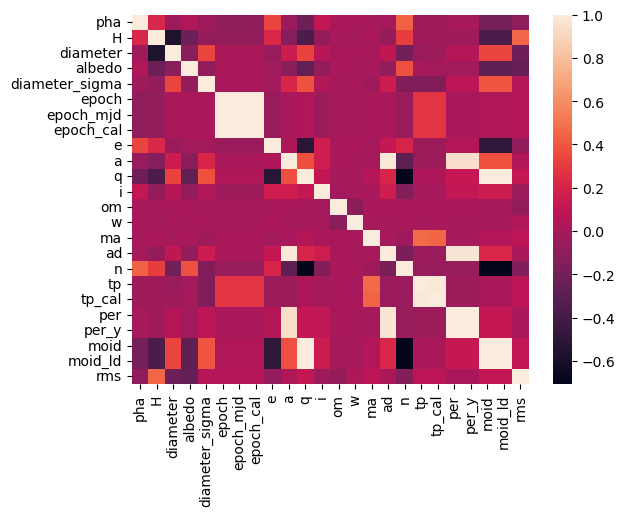

In [7]:
# Dropping Columns that are Obvious Indicators of Asteroid's Hazard Level, to prevent Interference with the Training Process
df=df.drop(columns=["neo","class"])
sns.heatmap(df.corr());

We can see that our target column (pha) has high positive correlations with eccentricity (e) and mean motion (n), and high negative correlations with perhilion distance (q) and Earth minimum orbit intersection distance (moid).

# Splitting the Training and Testing Data 

In [8]:
X=df.drop(columns=["pha"])
y=df.pha

# Splitting Data into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((98356, 23), (32786, 23), (98356,), (32786,))

# Developing the Neural Networks

First, we'll construct a very simple 4-line neural network. After evaluating the results, we'll improve the model and see if we can increase the accuracy

In [9]:
# Very Simple Neural Network
model1=Sequential()
model1.add(Dense(1))
model1.compile(loss = 'mse',metrics=['accuracy'])
model1.fit(X_train,y_train,epochs=5)

# Evaluating the Model
loss, accuracy = model1.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

Epoch 1/5

3074/3074 [==============================] - 13s 4ms/step - loss: 0.3987 - accuracy: 0.9812

Epoch 2/5

3074/3074 [==============================] - 13s 4ms/step - loss: 0.2104 - accuracy: 0.9958

Epoch 3/5

3074/3074 [==============================] - 11s 4ms/step - loss: 0.3287 - accuracy: 0.9958

Epoch 4/5

3074/3074 [==============================] - 12s 4ms/step - loss: 0.2907 - accuracy: 0.9960

Epoch 5/5

3074/3074 [==============================] - 11s 4ms/step - loss: 0.2194 - accuracy: 0.9959

1025/1025 [==============================] - 4s 3ms/step - loss: 0.0504 - accuracy: 0.9959

Model loss on the test set: 0.05041471868753433

Model accuracy on the test set: 99.59%


An accuracy of **99.59%** is already almost perfect, and attests to the power of neural networks, even very simple ones. Lets try to improve the neural network by adding the following:
* Adding more Hidden Layers, including a input layer, and a output layer
* Increase the amount of output neurons in the first hidden layer, then decrease to improve training process
* Activate the hidden layers with the Rectified Linear Unit to introduce non-linearity
* Activate the output layer with sigmoid to output a value between 0 and 1, for binary classification
* Compile with the optimizer Adam, which is used to minimize the loss function
* Compile with binary_crossentropy, which is better suited for classification tasks
* Increase epochs to 20, and use X_test and y_test for validation data

In [10]:
# More Complicated Neural Network
model2 = Sequential()

# Adding the input layer and the first hidden layer
model2.add(Dense(64, activation = 'relu', input_dim = 23))
# Adding the dropout layer
model2.add(Dropout(0.2))
# Adding the second hidden layer
model2.add(Dense(units = 32, activation = 'relu'))
# Adding the output layer
model2.add(Dense(units = 1,activation='sigmoid'))

# Compiling the ANN
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])

# Fitting the ANN to the Training set
history=model2.fit(X_train, y_train, epochs = 20,validation_data=(X_test, y_test))

# Evaluating the Model
loss, accuracy = model2.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

Epoch 1/20

3074/3074 [==============================] - 24s 7ms/step - loss: 0.0189 - accuracy: 0.9948 - val_loss: 0.0011 - val_accuracy: 0.9997

Epoch 2/20

3074/3074 [==============================] - 20s 7ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 9.6248e-04 - val_accuracy: 0.9996

Epoch 3/20

3074/3074 [==============================] - 20s 7ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 8.0443e-04 - val_accuracy: 0.9997

Epoch 4/20

3074/3074 [==============================] - 21s 7ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0028 - val_accuracy: 0.9993

Epoch 5/20

3074/3074 [==============================] - 20s 7ms/step - loss: 9.3884e-04 - accuracy: 0.9997 - val_loss: 7.3905e-04 - val_accuracy: 0.9997

Epoch 6/20

3074/3074 [==============================] - 20s 6ms/step - loss: 9.2212e-04 - accuracy: 0.9997 - val_loss: 8.6052e-04 - val_accuracy: 0.9997

Epoch 7/20

3074/3074 [==============================] - 24s 8ms/step - loss: 8.7824e-04 - acc

**99.97%** is exceptional, and a small improvement from the simple neural network. We could aim for an even higher accuracy by increasing the number of epochs or using a randomized/grid search to determine the best parameters

# Analyzing the Model

Let's plot our model's loss and accuracy to further evaluate our model.

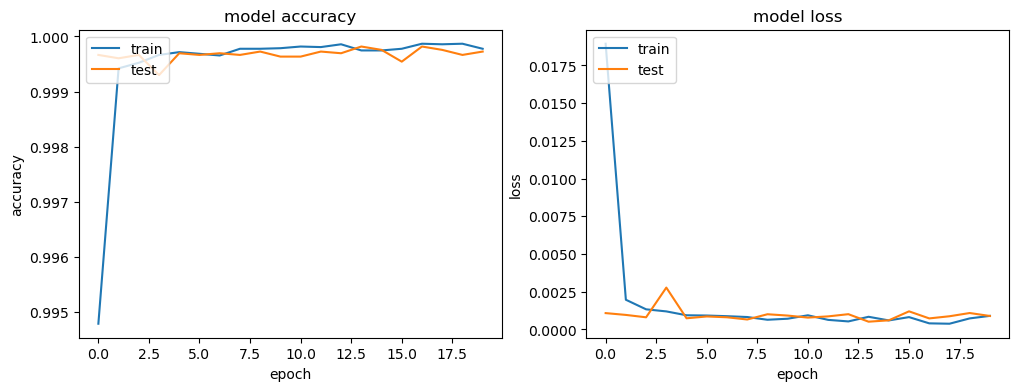

In [11]:
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

# Plotting Model Accuracy over Epochs
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')

# Plotting Model Loss over Epochs
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

As we can see, increasing the number of epochs could result in very gradual improvement, as both the training and validation accuracy seem to increase.

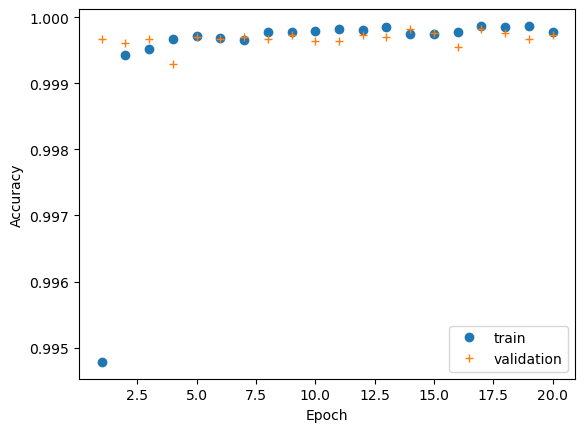

In [12]:
# Loss Function with Train and Validation
history=history.history
ac_train = history['accuracy']
ac_val = history['val_accuracy']

epoch = np.arange(len(ac_train)) + 1
plt.plot(epoch, ac_train, 'o', label="train")
plt.plot(epoch, ac_val, '+', label="validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Let's plot a confusion matrix to observe what our true/false positives/negatives are.

1025/1025 [==============================] - 4s 4ms/step


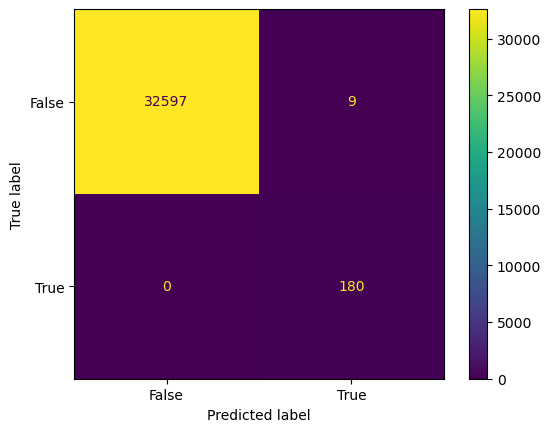

In [13]:
# Confusion Matrix
y_pred = model2.predict(X_test).round()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

We observe that our model predicted that the asteroid is hazardous every single time, and mistakenly predicted the asteroid as hazardous only 9 out of 32606 times.

# True/False Positive Analysis
Based on our true/false positives, let's observe our accuracy, precision, recall, and F1 Score for the positive class.

A quick definetion of precision, recall, and F1 Score:

**Precision**
The number of samples actually belonging to the positive class out of all the samples that were predicted to be of the positive class by the model.

Example: Positive Class

$Precision=\frac{True Positive}{True Positive + False Positive}$

**Recall**
The number of samples predicted correctly to be belonging to the positive class out of all the samples that actually belong to the positive class.

Example: Positive Class

$Recall=\frac{True Positive}{True Positive + False Negative}$

**F1 Score**
The harmonic mean of the precision and recall scores obtained for the positive class.

Example: Positive Class

$F1-Score=\frac{2 * Precision * Recall}{Precision + Recall}$

In [14]:
#Calculating Positive Precision, Positive Recall, and Positive F1 Score from the True/False Positives/Negatives
true_positive=confusion_matrix[0][0]
false_positive=confusion_matrix[0][1]
true_negative=confusion_matrix[1][1]
false_negative=confusion_matrix[1][0]

accuracy=(true_positive+true_negative)/(true_positive+true_negative+false_positive+false_negative)
precision=(true_positive)/(true_positive+false_positive)
recall=(true_positive)/(true_positive+false_negative)
F1_score= (2*precision*recall)/(precision+recall)

print('Based on the true/false positives and negatives:')
print(f"Accuracy is: {100*accuracy:.2f}%")
print(f"Precision is: {100*precision:.2f}%")
print(f"Recall is: {100*recall:.2f}%")
print(f"F1 Score is: {100*F1_score:.2f}%")

Based on the true/false positives and negatives:

Accuracy is: 99.97%

Precision is: 99.97%

Recall is: 100.00%

F1 Score is: 99.99%


Obviously our recall isn't 100% perfect, but it's close enough to round up to 100% instead of 99.99%.

# ROC Curve

Now let's plot a ROC Curve (Receiver Operating Characteristic Curve). ROC Curves are used to show the performance of a classification model at multiple thresholds, including a true positive rate and a false positive rate.

In [15]:
# Getting data for ROC Curve
y_pred1 = model1.predict(X_test).ravel()
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_pred1)

y_pred2 = model2.predict(X_test).ravel()
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_pred1)

auc_1 = auc(fpr_1, tpr_1)

auc_2 = auc(fpr_2, tpr_2)

1025/1025 [==============================] - 3s 2ms/step

1025/1025 [==============================] - 3s 3ms/step


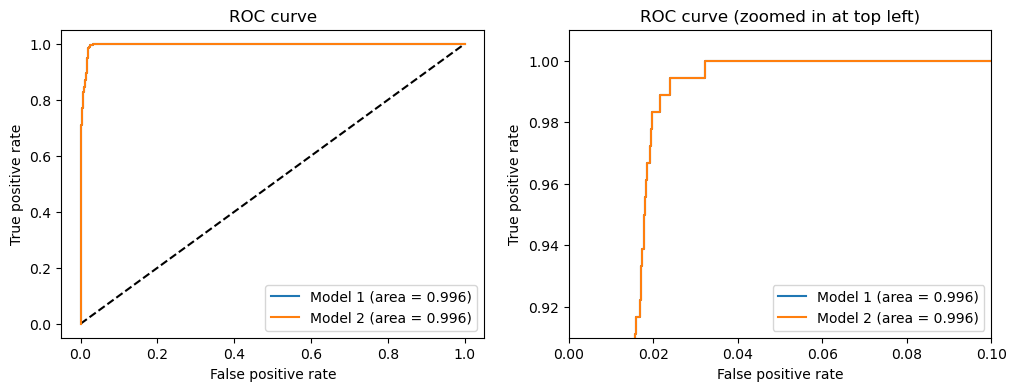

In [16]:
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

#Plotting ROC Curve
ax1.plot([0, 1], [0, 1], 'k--')
ax1.plot(fpr_1, tpr_1, label='Model 1 (area = {:.3f})'.format(auc_1))
ax1.plot(fpr_2, tpr_2, label='Model 2 (area = {:.3f})'.format(auc_2))
ax1.set_xlabel('False positive rate')
ax1.set_ylabel('True positive rate')
ax1.set_title('ROC curve')
ax1.legend(loc='best')

ax2.set_xlim(0, 0.1)
ax2.set_ylim(0.91, 1.01)
ax2.plot([0, 1], [0, 1], 'k--')
ax2.plot(fpr_1, tpr_1, label='Model 1 (area = {:.3f})'.format(auc_1))
ax2.plot(fpr_2, tpr_2, label='Model 2 (area = {:.3f})'.format(auc_2))
ax2.set_xlabel('False positive rate')
ax2.set_ylabel('True positive rate')
ax2.set_title('ROC curve (zoomed in at top left)')
ax2.legend(loc='best')

plt.show()

We plot both neural networks, but as we can see, only one line is plotted. This is because the False Positive Rate and True Positive Rate at each point are the exact same for both. We also observe that the area under the models if 0.996, which is a metric that is also used to evaluate classification models.